In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats


In [11]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df=df = df[['Age', 'Fare','Survived']]
df.isnull().sum()
df

,Age,Fare,Survived
0,22.000000,7.2500,0
1,38.000000,71.2833,1
2,26.000000,7.9250,1
3,35.000000,53.1000,1
4,35.000000,8.0500,0
...,...,...,...
886,27.000000,13.0000,0
887,19.000000,30.0000,1
888,29.699118,23.4500,0
889,26.000000,30.0000,1


In [25]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipykernel_29058/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipykernel_29058/694922604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [32]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1:]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  


In [34]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


<Figure size 1400x400 with 0 Axes>

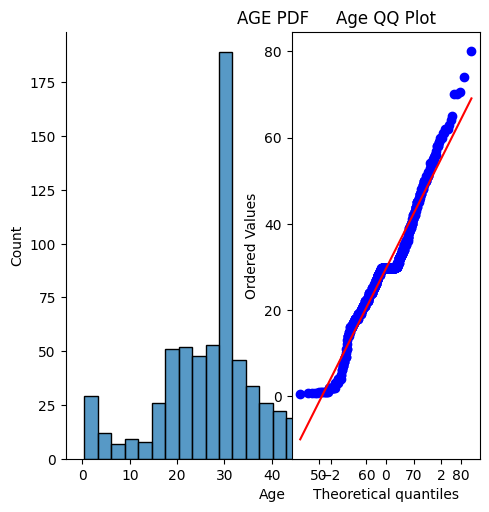

In [44]:
plt.figure(figsize=(14,4))

sns.displot(x_train['Age'])
plt.title("AGE PDF")

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')

plt.show()

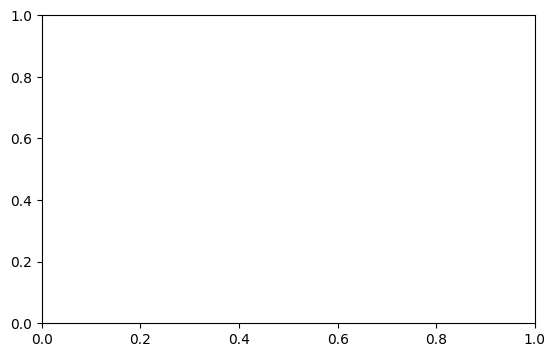

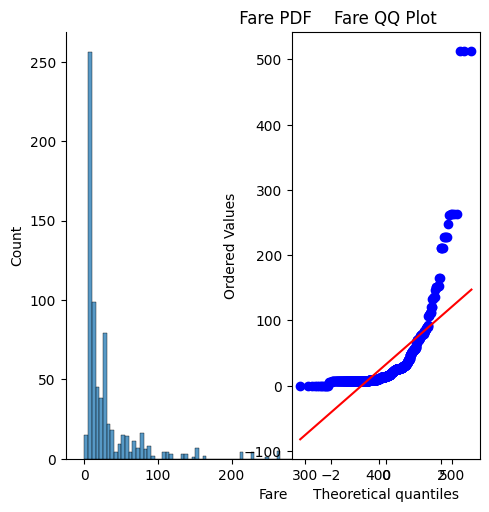

In [45]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(x_train['Fare'])
plt.title(" Fare PDF")

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')

plt.show()

# fuction for given a function which return the accuracy and the graph of before and after tranceformation: 

In [68]:
def ApplyTranceform(transform):
    x=df.iloc[:,0:2]
    y=df.iloc[:,-1:]
    transe=ColumnTransformer([
        ('fare_transe',FunctionTransformer(transform),['Fare'])
    ],remainder='passthrough')
    x_transe=transe.fit_transform(x);
    clf=LogisticRegression()
    print("Accuracy:", np.mean(cross_val_score(clf, x_transe, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(x['Fare'],dist="norm",plot=plt)
    plt.title('Before')
    
    plt.subplot(122)
    stats.probplot(x_transe[:,-1],dist="norm",plot=plt)
    plt.title('After')
    
    plt.show()
    
    

/home/srabon/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srabon/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srabon/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srabon/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Accuracy: 0.61729088639201


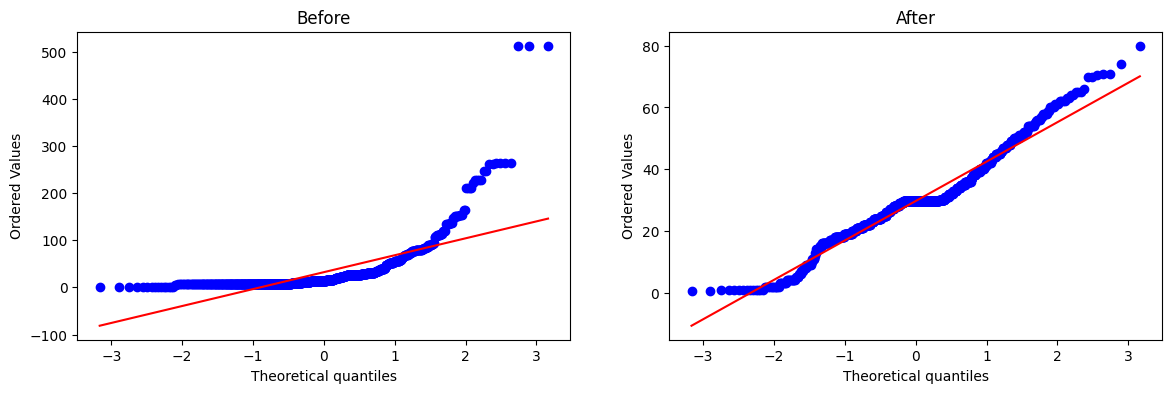

In [74]:
ApplyTranceform(lambda x:1/(x+0.1))